# 함수(def) 기초

### 🔰 함수 선언 및 호출

- 가장 기초적인 모양의 def 정의 
- 이름(test_func)과 입력 매개변수(a, b)를 정해준다.
- 출력(return)을 작성해준다.

In [1]:
def test_func(a, b):
    return a + b

In [2]:
c = test_func(2, 3)
c

5

In [3]:
5 + c

10

### 🔰 전역변수

- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아니다.

- 전역 변수를 함수 내에서 사용하고 싶다면 global Keyword로 선언해야 한다.

In [4]:
a = 1 # 전역변수(global)

def edit_a(i):    
    a = i # 지역변수(local)

In [5]:
edit_a(10)

In [6]:
a

1

In [7]:
a = 1

def edit_a(i):
    global a
    a = i

In [8]:
edit_a(10)

In [9]:
a

10

### 🔰 삼각함수

- 삼각함수의 표준형 : $ y = asin(2\pi ft + t_0) + b $

	- a : amplitude, 진폭
	- f : frequency, 주파수·진동
	- t : time
	- b : bias, 편중·편향성

In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

- Docstring

	- 함수 내에 쌍따옴표(") 혹은 홑따옴표(') 세 개를 이용해 주석을 달아주면 Docstring(함수명 끝에 커서를 두고 Shift + Tab)을 통해 볼 수 있다.

In [11]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    # Docstring
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    Param:
    amplitude: 진폭
    frequency: 주파수, 진동
    """    
    time = np.arange(startTime, endTime, sampleTime)
    fsin = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, fsin)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

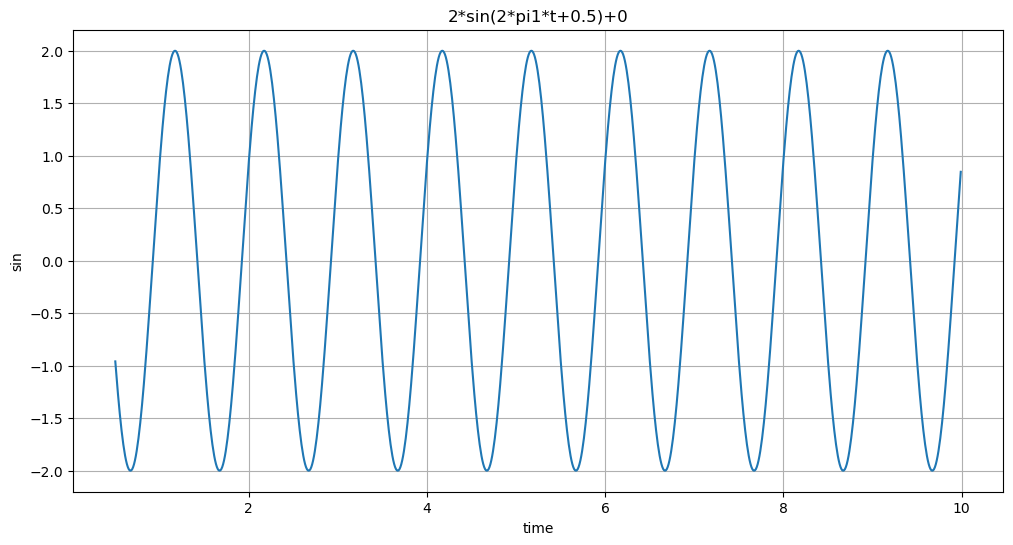

In [12]:
plotSinWave(2, 1, 10, 0.01, 0.5, 0)

- `**kwargs`
	- keyword arguments
	
	- 매개변수명은 중요하지 않다. 별 2개 `**`가 중요하다.!!
	- `**`는 dictionary unpacking을 의미한다.

	- 함수의 인자가 많은 경우, 함수 각 인자들의 위치를 외우기가 쉽지 않다.
	- 호출할 때마다 선언 내용을 살펴봐야한다.
	- 이런 경우 `**kwargs`를 사용한다.
	- 사용자가 매개변수를 직접 명시하고 인수를 전달할 수 있다.
	- 인수가 설정되지 않으면 Default 값이 사용된다.

In [17]:
np.arange(0, 1.01, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [21]:
def plotSinWave(**kwargs):
    # Docstring
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    - Param:
        - amplitude: 진폭
        - frequency: 주파수, 진동
        - t_0: start time
    """
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    startTime = kwargs.get("startTime", 0)
    endTime = kwargs.get("endTime", 1.01)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    fsin = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, fsin)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

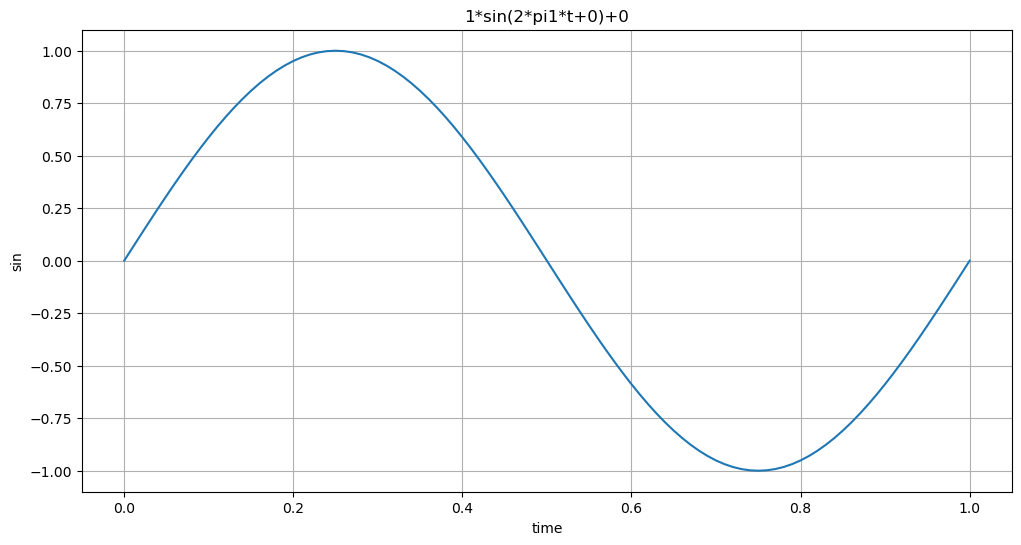

In [22]:
plotSinWave()

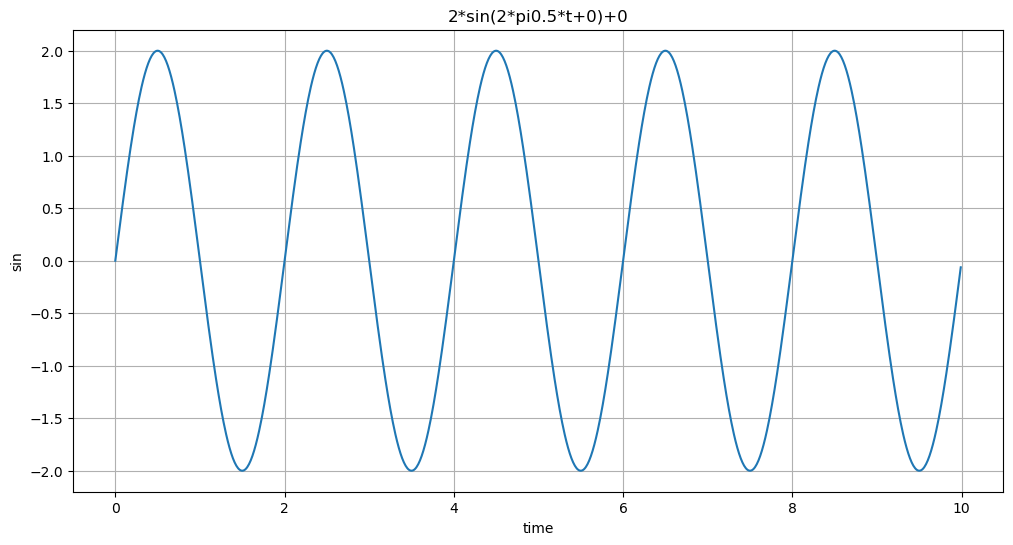

In [23]:
plotSinWave(amp=2, freq=0.5, endTime=10)

# 내가 만든 함수 import

- 사용자가 정의한 함수를 모듈로 import해서 사용해 본다.

### 🔰 drawSinWave.py

- 새 파일 생성으로 .py 파일을 만들어도 되고, `%%writefile` 명령으로 만들어도 된다.

- `%%writefile` 명령으로 파일 생성

    - jupyter notebook에서 사용 가능하고,
    - VSCode에서도 사용 가능하다.

- `%%writefile ./drawSinWave.py` 명령으로 파이썬 파일을 만든다.
    
    - 현재 경로에서 drawSinWave.py 파일을 만들라는 명령이다.

In [51]:
%%writefile ./drawSinWave.py

import numpy as np 
import matplotlib.pyplot as plt 

def plotSinWave(**kwargs):
    # Docstring
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    - Param:
        - amplitude: 진폭
        - frequency: 주파수, 진동
        - t_0: start time
    """
    kwargs = {
        "amp": 1,
        "freq": 1,
        "startTime": 0,
        "endTime": 1.01,
        "sampleTime": 0.01,
        "bias": 0,
        "figsize": (12, 6)
    }
    amp = kwargs.get("amp")
    freq = kwargs.get("freq")
    sampleTime = kwargs.get("sampleTime")
    startTime = kwargs.get("startTime")
    endTime = kwargs.get("endTime")
    bias = kwargs.get("bias")
    figsize = kwargs.get("figsize")
    
    time = np.arange(startTime, endTime, sampleTime)
    fsin = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize)
    plt.plot(time, fsin)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()
    
if __name__ == "__main__":
    print("hello world~!!")
    print("this is test graph!!")
    plotSinWave(amp=1, endTime=2)

Overwriting ./drawSinWave.py


In [43]:
import drawSinWave as dS

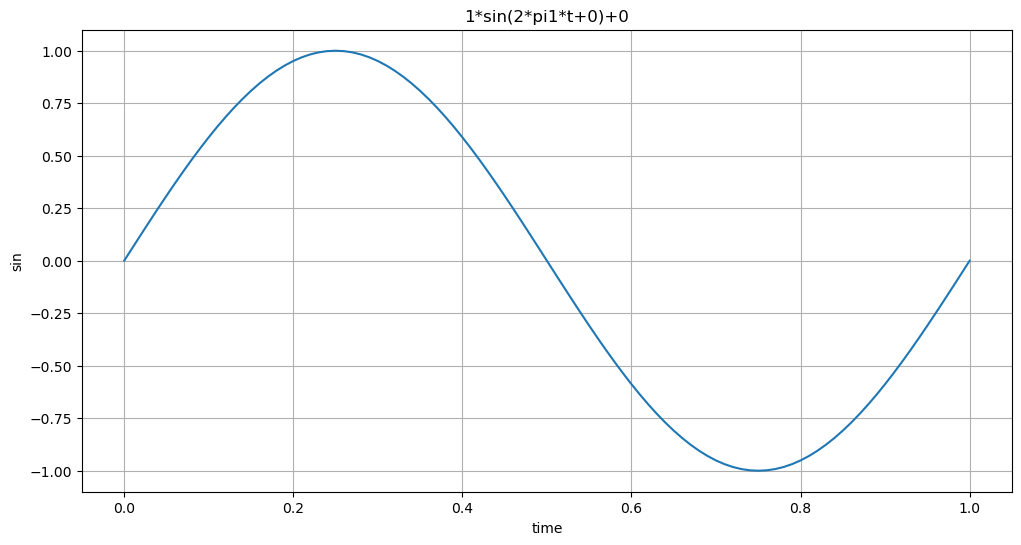

In [44]:
dS.plotSinWave()

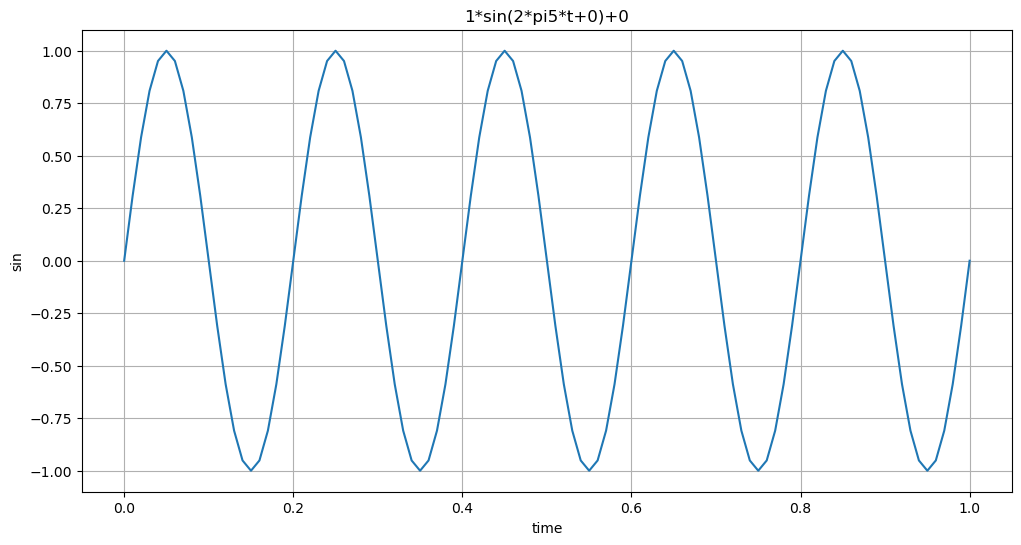

In [45]:
dS.plotSinWave(freq=5)

### 🔰 matplotlib 한글 설정 모듈화

In [48]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
    print("Hangul OK in your MAC!!!")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
    print("Hangul OK in your Windows!!!")
else:
    print("Unknown system.. sorry~~~")
    
plt.rcParams["axes.unicode_minus"] = False
get_ipython().run_line_magic("matplotlib", "inline")

Writing ./set_matplotlib_hangul.py


In [49]:
import set_matplotlib_hangul

Hangul OK in your Windows!!!


Text(0.5, 1.0, '한글')

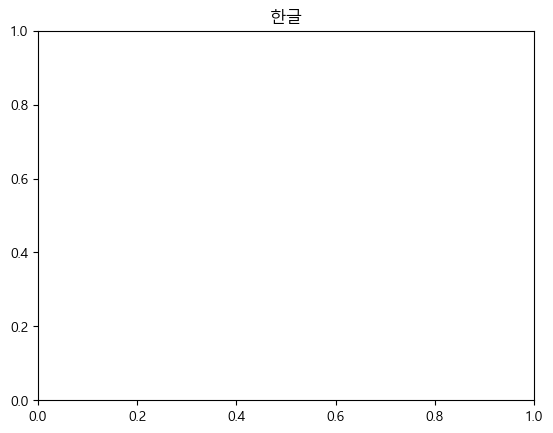

In [50]:
plt.title("한글")